Frequency Table:
 Uncertainty Type                   Confidence Intervals  Distribution Curves  Error Bars  Gradient or Transparency  Prediction Intervals  Shaded Areas
Type                                                                                                                                                  
3D Surface Plot                                       0                    0           0                         2                     1             0
Bar Plot                                              1                    0           1                         1                     0             0
Box Plot                                              0                    2           0                         0                     0             0
Circular Confidence Interval Plot                     0                    0           0                         0                     1             0
Classification Map                                    0                    0

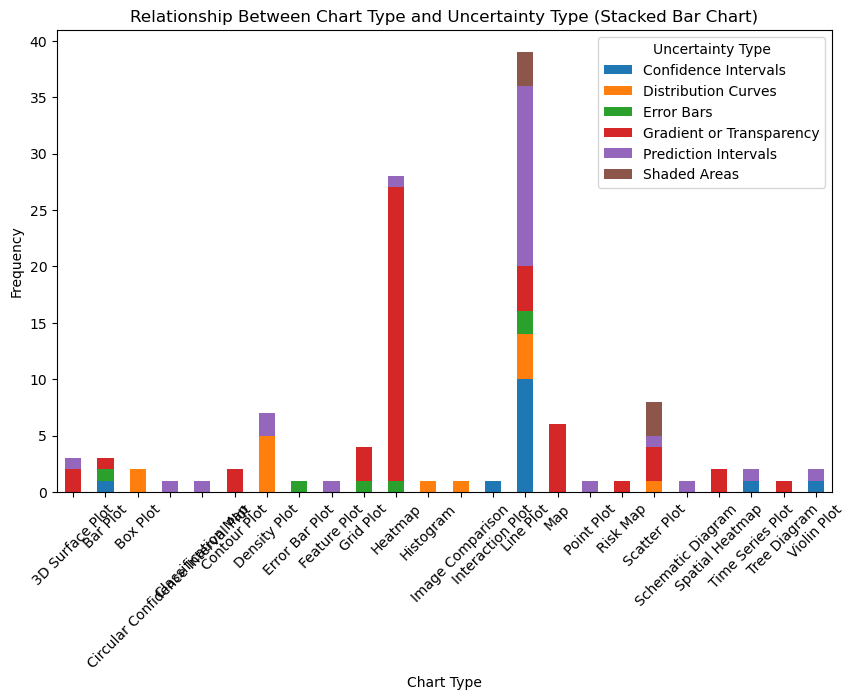

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Reading CSV files
file_path = "FFv.csv"
df_sheet = pd.read_csv(file_path)
df_sheet3 = df_sheet[df_sheet["Journal"] == "JABE"]


# Setting Pandas Display Options
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 200)  

# Select relevant columns and remove missing values
columns_to_use = ['Type', 'Uncertainty Type']
df_filtered = df_sheet3[columns_to_use].dropna()

# Creating a Contingency Table
contingency_table = pd.crosstab(df_filtered['Type'], df_filtered['Uncertainty Type'])

# Calculate the chi-square statistic (Chi-Square Test)
chi2_stat, p_value, dof, expected_freq = stats.chi2_contingency(contingency_table)

# Calculation of Standardised Residuals (SR)
residuals = (contingency_table - expected_freq) / np.sqrt(expected_freq)

# Calculation Cramér's V
n = np.sum(contingency_table.values)  # Calculate total sample size
r, c = contingency_table.shape  # Get the number of rows and columns
cramers_v = np.sqrt(chi2_stat / (n * min(r-1, c-1)))  # Calculate Cramér’s V

# print the results
print("Frequency Table:\n", contingency_table)
print("\nChi-Square Test Results:")
print(f"Statistic: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"\nStandardized Residuals:\n{residuals}")
print(f"\nCramér's V: {cramers_v}")

# Visualisation: stacked bar charts
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Relationship Between Chart Type and Uncertainty Type (Stacked Bar Chart)")
plt.ylabel("Frequency")
plt.xlabel("Chart Type")
plt.xticks(rotation=45)
plt.legend(title="Uncertainty Type")
plt.show()